In [1]:
import pandas as pd
import folium as fl
import datetime
import folium
import shapefile as shp
import shapely
from shapely.geometry import Point, Polygon, LineString, GeometryCollection


#import cartopy.crs as crs
#import cartopy.feature as cfeature
import matplotlib.pyplot as plt
#from cartopy.io.shapereader import Reader
import geopandas as gpd
#import json
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import plotly.express as px

In [2]:
d16=pd.read_excel('2016pnb.xlsx')
d17=pd.read_excel('2017pnb.xlsx')
d18=pd.read_excel('2018pnb.xlsx')
d19=pd.read_excel('2019pnb_latest.xlsx')
d20=pd.read_excel('2020pnb.xlsx')
d21=pd.read_excel('CRB.xlsx')

In [3]:
start_date=datetime.datetime.strptime('01-09','%d-%m')
end_date=datetime.datetime.strptime('30-11','%d-%m')

In [4]:
d16.rename(columns={'LATITUDE':'lat',
                  'LONGITUDE':'lon',
                  'ACQ_DATE':'date'},inplace=True)

d17.rename(columns={'LATITUDE':'lat',
                  'LONGITUDE':'lon',
                  'ACQ_DATE':'date'},inplace=True)

d18.rename(columns={'LATITUDE':'lat',
                  'LONGITUDE':'lon',
                  'ACQ_DATE':'date'},inplace=True)

d19.rename(columns={'LATITUDE':'lat',
                  'LONGITUDE':'lon',
                  'ACQ_DATE':'date'},inplace=True)

d20.rename(columns={'LATITUDE':'lat',
                  'LONGITUDE':'lon',
                  'ACQ_DATE':'date'},inplace=True)

d21.rename(columns={'LATITUDE':'lat',
                  'LONGITUDE':'lon',
                  'ACQ_DATE':'date'},inplace=True)

In [5]:
d16.sort_values(by='date',inplace=True)
d17.sort_values(by='date',inplace=True)
d18.sort_values(by='date',inplace=True)
d19.sort_values(by='date',inplace=True)
d20.sort_values(by='date',inplace=True)
d21.sort_values(by='date',inplace=True)

In [6]:
lst_days=[]
lst_2016=[]
lst_2017=[]
lst_2018=[]
lst_2019=[]
lst_2020=[]
lst_2021=[]

dt=start_date
while dt<=end_date:
    dy=dt.day
    mt=dt.month
    cur_date=f'{dy}/{mt}'
    lst_days.append(cur_date)
    # year wise cum sum
    lst_2016.append(d16[d16['date']<=datetime.datetime.strptime(f'{dy}-{mt}-2016','%d-%m-%Y')].shape[0])
    lst_2017.append(d17[d17['date']<=datetime.datetime.strptime(f'{dy}-{mt}-2017','%d-%m-%Y')].shape[0])
    lst_2018.append(d18[d18['date']<=datetime.datetime.strptime(f'{dy}-{mt}-2018','%d-%m-%Y')].shape[0])
    lst_2019.append(d19[d19['date']<=datetime.datetime.strptime(f'{dy}-{mt}-2019','%d-%m-%Y')].shape[0])
    lst_2020.append(d20[d20['date']<=datetime.datetime.strptime(f'{dy}-{mt}-2020','%d-%m-%Y')].shape[0])
    if datetime.datetime.strptime(f'{cur_date}/2021','%d/%m/%Y')<=datetime.datetime.strptime('24-10-2021','%d-%m-%Y'):
        lst_2021.append(d21[d21['date']<=datetime.datetime.strptime(f'{dy}-{mt}-2021','%d-%m-%Y')].shape[0])
    else:
        lst_2021.append(None)
    dt+=datetime.timedelta(days=1)

In [7]:
data=pd.DataFrame()
data['date']=lst_days
data['2016']=lst_2016
data['2017']=lst_2017
data['2018']=lst_2018
data['2019']=lst_2019
data['2020']=lst_2020
data['2021']=lst_2021

In [8]:
color_discrete_map = {'2016':'green', '2017':'pink','2018':'orange','2019':'magenta','2020':'red','2021':'black'}

fig=px.line(data,x='date',y=['2016','2017','2018','2019','2020','2021'],color_discrete_map=color_discrete_map,markers=True)

# plt.title('')

fig.update_layout(
    title='year wise cummulative crop burning'.upper(),
    xaxis_title='Date in sep,oct,nov',
    yaxis_title='Cummulative number of crop burnings',
    title_x=0.5
)
#fig.update_layout(width=1000,height=2000)
fig.show()

In [40]:
d2=gpd.read_file('punjab_shapefile/punjab.shp')

In [11]:
d2['polygon']=d2['coords'].apply(lambda x: Polygon(x))

In [12]:
dist_to_poly=dict(zip(d2.DISTRICT,d2.polygon))

In [13]:
def get_district(point):
    for dist in dist_to_poly.keys():
        if point.within(dist_to_poly[dist]):
            return dist
    return -1

In [14]:
d16['district']=d16.apply(lambda x:get_district(Point(x['lon'],x['lat'])),axis=1)
d17['district']=d17.apply(lambda x:get_district(Point(x['lon'],x['lat'])),axis=1)
d18['district']=d18.apply(lambda x:get_district(Point(x['lon'],x['lat'])),axis=1)
d19['district']=d19.apply(lambda x:get_district(Point(x['lon'],x['lat'])),axis=1)
d20['district']=d20.apply(lambda x:get_district(Point(x['lon'],x['lat'])),axis=1)
d21['district']=d21.apply(lambda x:get_district(Point(x['lon'],x['lat'])),axis=1)

In [15]:
d16_=d16[d16['date']<datetime.datetime.strptime('2016-10-25','%Y-%m-%d')]
d17_=d17[d17['date']<datetime.datetime.strptime('2017-10-25','%Y-%m-%d')]
d18_=d18[d18['date']<datetime.datetime.strptime('2018-10-25','%Y-%m-%d')]
d19_=d19[d19['date']<datetime.datetime.strptime('2019-10-25','%Y-%m-%d')]
d20_=d20[d20['date']<datetime.datetime.strptime('2020-10-25','%Y-%m-%d')]
d21_=d21[d21['date']<datetime.datetime.strptime('2021-10-25','%Y-%m-%d')]


In [16]:
t16=pd.DataFrame(d16['district'].value_counts()).reset_index()
t17=pd.DataFrame(d17['district'].value_counts()).reset_index()
t18=pd.DataFrame(d18['district'].value_counts()).reset_index()
t19=pd.DataFrame(d19['district'].value_counts()).reset_index()
t20=pd.DataFrame(d20['district'].value_counts()).reset_index()
t21=pd.DataFrame(d21['district'].value_counts()).reset_index()


In [17]:
t16_=pd.DataFrame(d16_['district'].value_counts()).reset_index()
t17_=pd.DataFrame(d17_['district'].value_counts()).reset_index()
t18_=pd.DataFrame(d18_['district'].value_counts()).reset_index()
t19_=pd.DataFrame(d19_['district'].value_counts()).reset_index()
t20_=pd.DataFrame(d20_['district'].value_counts()).reset_index()
t21_=pd.DataFrame(d21_['district'].value_counts()).reset_index()


In [18]:
t16.rename(columns={'index':'district','district':'num_crop_burning'},inplace=True)
t17.rename(columns={'index':'district','district':'num_crop_burning'},inplace=True)
t18.rename(columns={'index':'district','district':'num_crop_burning'},inplace=True)
t19.rename(columns={'index':'district','district':'num_crop_burning'},inplace=True)
t20.rename(columns={'index':'district','district':'num_crop_burning'},inplace=True)
t21.rename(columns={'index':'district','district':'num_crop_burning'},inplace=True)


In [19]:
t16_.rename(columns={'index':'district','district':'num_crop_burning'},inplace=True)
t17_.rename(columns={'index':'district','district':'num_crop_burning'},inplace=True)
t18_.rename(columns={'index':'district','district':'num_crop_burning'},inplace=True)
t19_.rename(columns={'index':'district','district':'num_crop_burning'},inplace=True)
t20_.rename(columns={'index':'district','district':'num_crop_burning'},inplace=True)
t21_.rename(columns={'index':'district','district':'num_crop_burning'},inplace=True)


In [20]:
t16['percentage_crop_burning']=t16['num_crop_burning'].apply(lambda x:x*100/t16['num_crop_burning'].sum())
t17['percentage_crop_burning']=t17['num_crop_burning'].apply(lambda x:x*100/t17['num_crop_burning'].sum())
t18['percentage_crop_burning']=t18['num_crop_burning'].apply(lambda x:x*100/t18['num_crop_burning'].sum())
t19['percentage_crop_burning']=t19['num_crop_burning'].apply(lambda x:x*100/t19['num_crop_burning'].sum())
t20['percentage_crop_burning']=t20['num_crop_burning'].apply(lambda x:x*100/t20['num_crop_burning'].sum())
t21['percentage_crop_burning']=t21['num_crop_burning'].apply(lambda x:x*100/t21['num_crop_burning'].sum())


In [21]:
t16_['percentage_crop_burning']=t16_['num_crop_burning'].apply(lambda x:x*100/t16_['num_crop_burning'].sum())
t17_['percentage_crop_burning']=t17_['num_crop_burning'].apply(lambda x:x*100/t17_['num_crop_burning'].sum())
t18_['percentage_crop_burning']=t18_['num_crop_burning'].apply(lambda x:x*100/t18_['num_crop_burning'].sum())
t19_['percentage_crop_burning']=t19_['num_crop_burning'].apply(lambda x:x*100/t19_['num_crop_burning'].sum())
t20_['percentage_crop_burning']=t20_['num_crop_burning'].apply(lambda x:x*100/t20_['num_crop_burning'].sum())
t21_['percentage_crop_burning']=t21_['num_crop_burning'].apply(lambda x:x*100/t21_['num_crop_burning'].sum())


## B. For 2021 data is available upto 24th october. for comparative analysis with current year we will analyse each year data upto 24th october in this section.

In [22]:
total_16=t16['num_crop_burning'].sum()
total_17=t17['num_crop_burning'].sum()
total_18=t18['num_crop_burning'].sum()
total_19=t19['num_crop_burning'].sum()
total_20=t20['num_crop_burning'].sum()
total_21=t21['num_crop_burning'].sum()

In [23]:
total_16_=t16_['num_crop_burning'].sum()
total_17_=t17_['num_crop_burning'].sum()
total_18_=t18_['num_crop_burning'].sum()
total_19_=t19_['num_crop_burning'].sum()
total_20_=t20_['num_crop_burning'].sum()
total_21_=t21_['num_crop_burning'].sum()

In [24]:
myTable=PrettyTable(['Sl.no','district','num_crop_burning','%_crop_burning'])
myTable.header=True
for i,row in t16_.iterrows():
    myTable.add_row([i,row['district'],row['num_crop_burning'],row['percentage_crop_burning']])
print('                                       \033[1m' + '2016' + '\033[0m')
print('                       \033[1m' +f'total crop burning in 2016 till 24th oct:{total_16_}' + '\033[0m')
print(myTable)
print()
print('*'*100)

myTable=PrettyTable(['Sl.no','district','num_crop_burning','%_crop_burning'])
myTable.header=True
for i,row in t17_.iterrows():
    myTable.add_row([i,row['district'],row['num_crop_burning'],row['percentage_crop_burning']])
print('                                       \033[1m' + '2017' + '\033[0m')
print('                       \033[1m' +f'total crop burning in 2017 till 24th oct:{total_17_}' + '\033[0m')

print(myTable)
print()
print('*'*100)


myTable=PrettyTable(['Sl.no','district','num_crop_burning','%_crop_burning'])
myTable.header=True
for i,row in t18_.iterrows():
    myTable.add_row([i,row['district'],row['num_crop_burning'],row['percentage_crop_burning']])
print('                                       \033[1m' + '2018' + '\033[0m')
print('                       \033[1m' +f'total crop burning in 2018 till 24th oct:{total_18_}' + '\033[0m')

print(myTable)
print()
print('*'*100)


myTable=PrettyTable(['Sl.no','district','num_crop_burning','%_crop_burning'])
myTable.header=True
for i,row in t19_.iterrows():
    myTable.add_row([i,row['district'],row['num_crop_burning'],row['percentage_crop_burning']])
print('                                       \033[1m' + '2019' + '\033[0m')
print('                       \033[1m' +f'total crop burning in 2019 till 24th oct:{total_19_}' + '\033[0m')

print(myTable)
print()
print('*'*100)


myTable=PrettyTable(['Sl.no','district','num_crop_burning','%_crop_burning'])
myTable.header=True
for i,row in t20_.iterrows():
    myTable.add_row([i,row['district'],row['num_crop_burning'],row['percentage_crop_burning']])
print('                                       \033[1m' + '2020' + '\033[0m')
print('                       \033[1m' +f'total crop burning in 2020 till 24th oct:{total_20_}' + '\033[0m')

print(myTable)
print()
print('*'*100)


myTable=PrettyTable(['Sl.no','district','num_crop_burning','%_crop_burning'])
myTable.header=True
for i,row in t21_.iterrows():
    myTable.add_row([i,row['district'],row['num_crop_burning'],row['percentage_crop_burning']])
print('                                       \033[1m' + '2021' + '\033[0m')
print('                       \033[1m' +f'total crop burning in 2021 till 24th oct:{total_21_}' + '\033[0m')

print(myTable)
print()
print('*'*100)

                                       2016
                       total crop burning in 2016 till 24th oct:18317
+-------+----------------------------+------------------+--------------------+
| Sl.no |          district          | num_crop_burning |   %_crop_burning   |
+-------+----------------------------+------------------+--------------------+
|   0   |         Tarn Taran         |       2077       | 11.339193099306655 |
|   1   |          Firozpur          |       1910       | 10.427471747556915 |
|   2   |          Patiala           |       1522       | 8.309220942294044  |
|   3   |          Muktsar           |       1492       | 8.145438663536606  |
|   4   |          Bathinda          |       1220       |  6.66047933613583  |
|   5   |         Jalandhar          |       1202       | 6.562209968881367  |
|   6   |          Amritsar          |       1154       | 6.300158322869465  |
|   7   |          Faridkot          |       1136       | 6.2018889556150025 |
|   8   |        

## Results of analysis on crop burning in date range- 01/09 to 24/10 of each year.
### 1. There is a common trend in relative numbers of crop burning in each city, followed each year till 24th October.
### 2. The following cities have most number of crop burning in recent years(2019-2021):-
####            a. Tarn Taran
####            b. Amritsar
####            c. Firozpur
####            d. Patiala 
####            e. Gurdaspur

### Clearly in the current year crop burnings have been on lower side in comparison to previous years.

In [25]:
map_df=gpd.read_file('punjab_shapefile/punjab.shp')

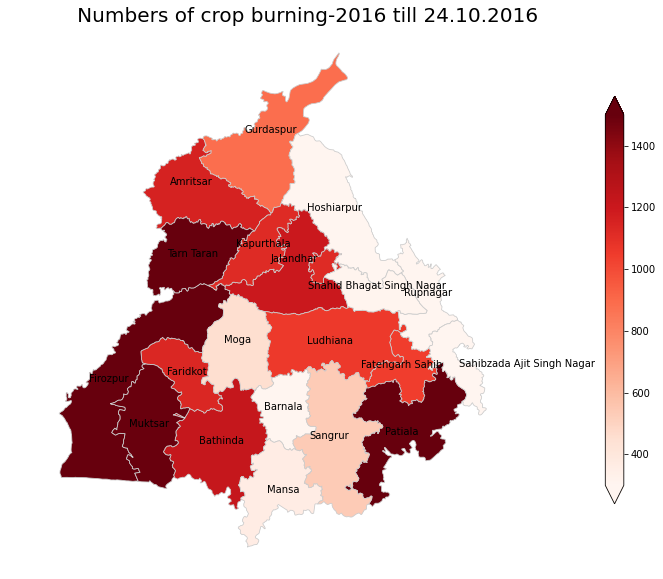

In [26]:
variable='num_crop_burning'
vmin,vmax=300,1500
fig, ax = plt.subplots(1, figsize=(35, 10))

merged=map_df.merge(t16_,left_on='DISTRICT',right_on='district')
merged=merged[['district','geometry','num_crop_burning','percentage_crop_burning']]

ax.axis('off')
ax.set_title('           Numbers of crop burning-2016 till 24.10.2016', fontdict={'fontsize': '20', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm,extend='both',shrink=0.75)

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))


merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    if row['district']=='Sahibzada Ajit Singh Nagar':
        plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='left')
        continue
    plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='center')



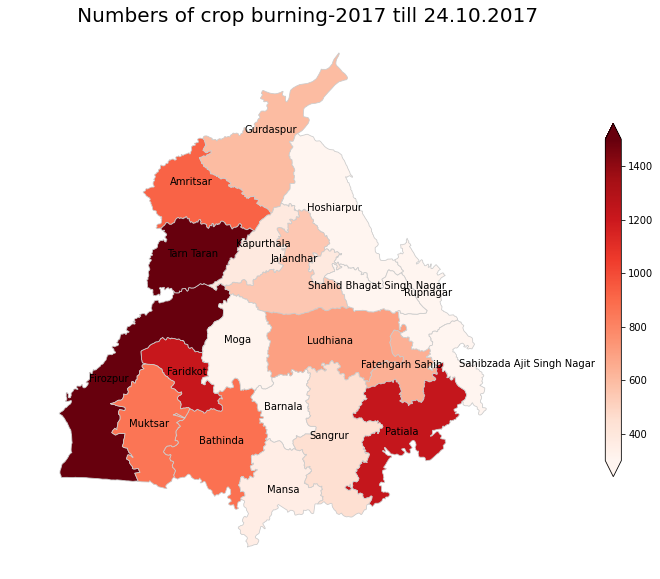

In [27]:
variable='num_crop_burning'
vmin,vmax=300,1500
fig, ax = plt.subplots(1, figsize=(35, 10))

merged=map_df.merge(t17_,left_on='DISTRICT',right_on='district')
merged=merged[['district','geometry','num_crop_burning','percentage_crop_burning']]

ax.axis('off')
ax.set_title('           Numbers of crop burning-2017 till 24.10.2017', fontdict={'fontsize': '20', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm,extend='both',shrink=0.65)

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))


merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    if row['district']=='Sahibzada Ajit Singh Nagar':
        plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='left')
        continue
    plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='center')

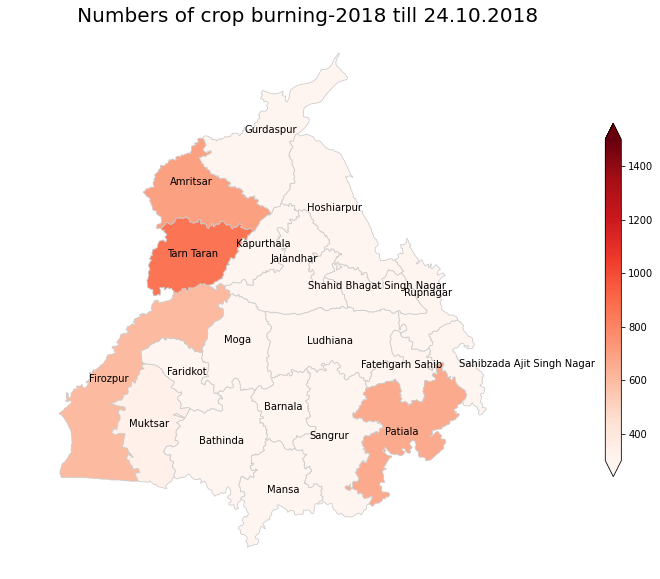

In [28]:
variable='num_crop_burning'
vmin,vmax=300,1500
fig, ax = plt.subplots(1, figsize=(35, 10))

merged=map_df.merge(t18_,left_on='DISTRICT',right_on='district')
merged=merged[['district','geometry','num_crop_burning','percentage_crop_burning']]

ax.axis('off')
ax.set_title('           Numbers of crop burning-2018 till 24.10.2018', fontdict={'fontsize': '20', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm,extend='both',shrink=0.65)

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))


merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    if row['district']=='Sahibzada Ajit Singh Nagar':
        plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='left')
        continue
    plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='center')

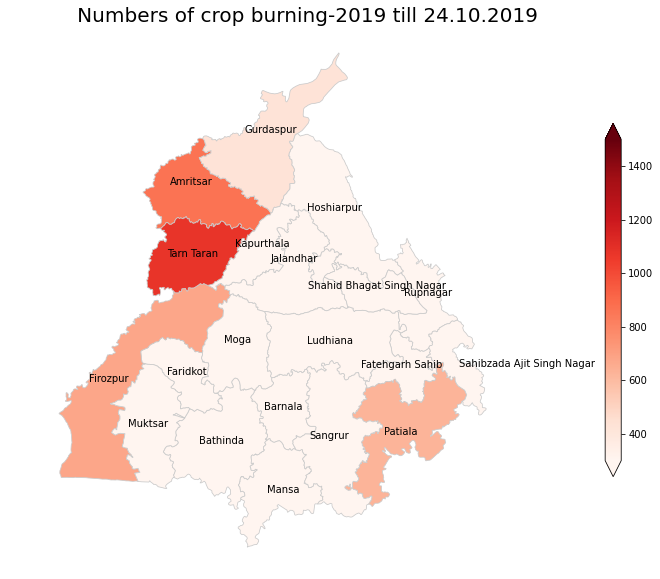

In [29]:
variable='num_crop_burning'
vmin,vmax=300,1500
fig, ax = plt.subplots(1, figsize=(35, 10))

merged=map_df.merge(t19_,left_on='DISTRICT',right_on='district')
merged=merged[['district','geometry','num_crop_burning','percentage_crop_burning']]

ax.axis('off')
ax.set_title('           Numbers of crop burning-2019 till 24.10.2019', fontdict={'fontsize': '20', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm,extend='both',shrink=0.65)

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))


merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    if row['district']=='Sahibzada Ajit Singh Nagar':
        plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='left')
        continue
    plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='center')

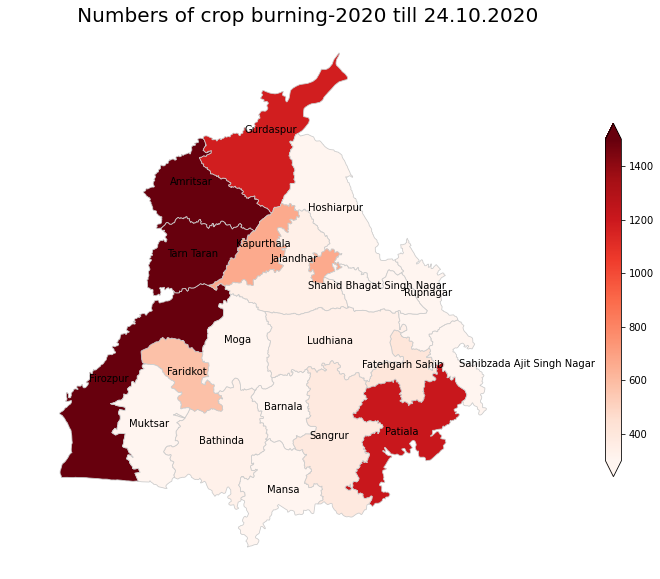

In [30]:
variable='num_crop_burning'
vmin,vmax=300,1500
fig, ax = plt.subplots(1, figsize=(35, 10))

merged=map_df.merge(t20_,left_on='DISTRICT',right_on='district')
merged=merged[['district','geometry','num_crop_burning','percentage_crop_burning']]

ax.axis('off')
ax.set_title('           Numbers of crop burning-2020 till 24.10.2020', fontdict={'fontsize': '20', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm,extend='both',shrink=0.65)

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))


merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    if row['district']=='Sahibzada Ajit Singh Nagar':
        plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='left')
        continue
    plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='center')

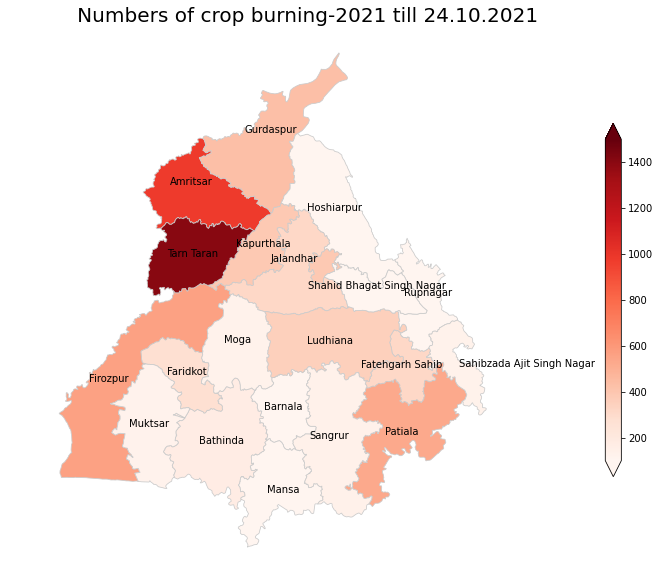

In [31]:
variable='num_crop_burning'
vmin,vmax=100,1500
fig, ax = plt.subplots(1, figsize=(35, 10))

merged=map_df.merge(t21_,left_on='DISTRICT',right_on='district')
merged=merged[['district','geometry','num_crop_burning','percentage_crop_burning']]

ax.axis('off')
ax.set_title('           Numbers of crop burning-2021 till 24.10.2021', fontdict={'fontsize': '20', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm,extend='both',shrink=0.65)

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))


merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    if row['district']=='Sahibzada Ajit Singh Nagar':
        plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='left')
        continue
    plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='center')

### C. In this section we will visualise crop burning for months of September, October and November for each year in 2016 to 2020.

In [32]:
myTable=PrettyTable(['Sl.no','district','num_crop_burning','%_crop_burning'])
myTable.header=True
for i,row in t16.iterrows():
    myTable.add_row([i,row['district'],row['num_crop_burning'],row['percentage_crop_burning']])
print('                                       \033[1m' + '2016' + '\033[0m')
print('                           \033[1m' +f'total crop burning in 2016:{total_16}' + '\033[0m')
print(myTable)
print()
print('*'*100)

myTable=PrettyTable(['Sl.no','district','num_crop_burning','%_crop_burning'])
myTable.header=True
for i,row in t17.iterrows():
    myTable.add_row([i,row['district'],row['num_crop_burning'],row['percentage_crop_burning']])
print('                                       \033[1m' + '2017' + '\033[0m')
print('                           \033[1m' +f'total crop burning in 2017:{total_17}' + '\033[0m')

print(myTable)
print()
print('*'*100)


myTable=PrettyTable(['Sl.no','district','num_crop_burning','%_crop_burning'])
myTable.header=True
for i,row in t18.iterrows():
    myTable.add_row([i,row['district'],row['num_crop_burning'],row['percentage_crop_burning']])
print('                                       \033[1m' + '2018' + '\033[0m')
print('                           \033[1m' +f'total crop burning in 2018:{total_18}' + '\033[0m')

print(myTable)
print()
print('*'*100)


myTable=PrettyTable(['Sl.no','district','num_crop_burning','%_crop_burning'])
myTable.header=True
for i,row in t19.iterrows():
    myTable.add_row([i,row['district'],row['num_crop_burning'],row['percentage_crop_burning']])
print('                                       \033[1m' + '2019' + '\033[0m')
print('                           \033[1m' +f'total crop burning in 2019:{total_19}' + '\033[0m')

print(myTable)
print()
print('*'*100)


myTable=PrettyTable(['Sl.no','district','num_crop_burning','%_crop_burning'])
myTable.header=True
for i,row in t20.iterrows():
    myTable.add_row([i,row['district'],row['num_crop_burning'],row['percentage_crop_burning']])
print('                                       \033[1m' + '2020' + '\033[0m')
print('                           \033[1m' +f'total crop burning in 2020:{total_20}' + '\033[0m')

print(myTable)
print()
print('*'*100)

                                       2016
                           total crop burning in 2016:86585
+-------+----------------------------+------------------+---------------------+
| Sl.no |          district          | num_crop_burning |    %_crop_burning   |
+-------+----------------------------+------------------+---------------------+
|   0   |          Sangrur           |      10117       |  11.684471906219322 |
|   1   |          Firozpur          |       9461       |  10.926834902119305 |
|   2   |            Moga            |       7817       |  9.028122654039382  |
|   3   |          Ludhiana          |       7739       |  8.938037766356759  |
|   4   |          Bathinda          |       7463       |  8.619275856095166  |
|   5   |          Muktsar           |       5617       |  6.487266847606398  |
|   6   |          Patiala           |       5426       |  6.266674366229717  |
|   7   |          Barnala           |       5043       |  5.824334469018883  |
|   8   |       

## Results of analysis on crop burning in months of September, October & Novemeber.

### 1. There is a common trend in relative numbers of crop burning in each district.

### 2. The following cities have most crop burning each year (2016-2020):-

#### a. Firozpur*
#### b. Sangrur*
#### c. Bathinda
#### d. Muktsar

###### *- highest numbers of crop burning observed.


In [33]:
## Results of analysis on crop burning in date range- 01/09 to 24/10 of each year.
### 1. There is a common trend in relative numbers of crop burning in each city, followed each year till 24th October.
### 2. The following cities have most number of crop burning in recent years(2019-2021):-
####            a. Tarn Taran
####            b. Amritsar
####            c. Firozpur
####            d. Patiala 
####            e. Gurdaspur

### Clearly in the current year crop burnings have been on lower side in comparison to previous years.

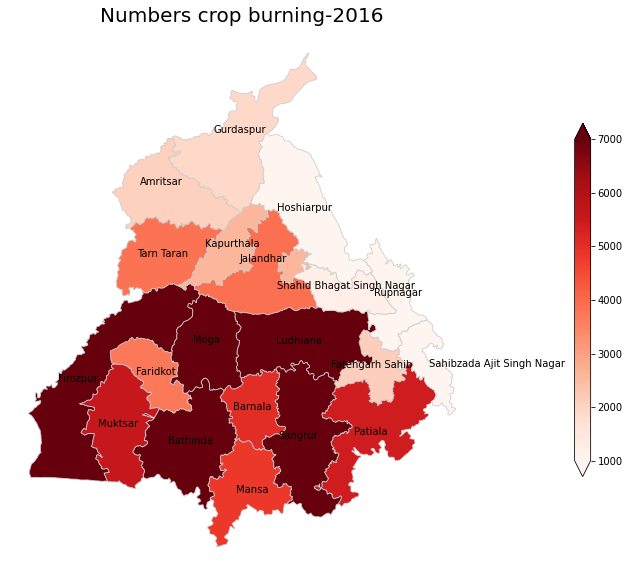

In [34]:
data=t16

merged=map_df.merge(data,left_on='DISTRICT',right_on='district')
merged=merged[['district','geometry','num_crop_burning','percentage_crop_burning']]

variable='num_crop_burning'

vmin,vmax=1000,7000

fig, ax = plt.subplots(1, figsize=(35, 10))
# remove the axis
ax.axis('off')

ax.set_title('Numbers crop burning-2016', fontdict={'fontsize': '20', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm,extend='both',shrink=0.65)

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))


merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    if row['district']=='Sahibzada Ajit Singh Nagar':
        plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='left')
        continue
    plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='center')

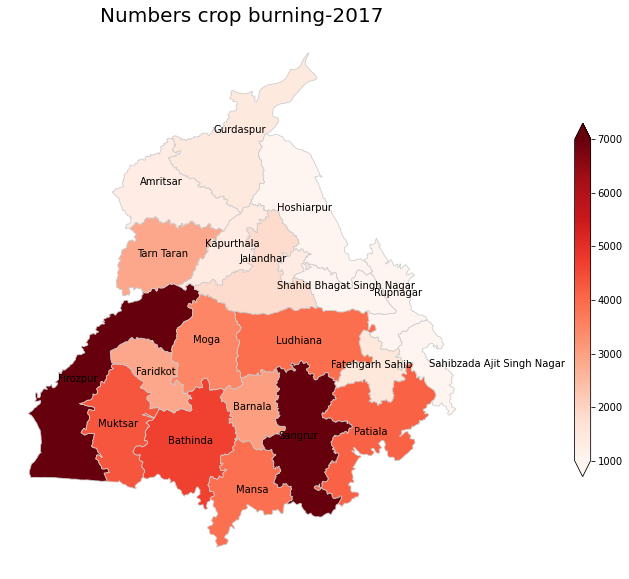

In [35]:
data=t17

merged=map_df.merge(data,left_on='DISTRICT',right_on='district')
merged=merged[['district','geometry','num_crop_burning','percentage_crop_burning']]

variable='num_crop_burning'

vmin,vmax=1000,7000

fig, ax = plt.subplots(1, figsize=(35, 10))
# remove the axis
ax.axis('off')

ax.set_title('Numbers crop burning-2017', fontdict={'fontsize': '20', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm,extend='both',shrink=0.65)

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))


merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    if row['district']=='Sahibzada Ajit Singh Nagar':
        plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='left')
        continue
    plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='center')

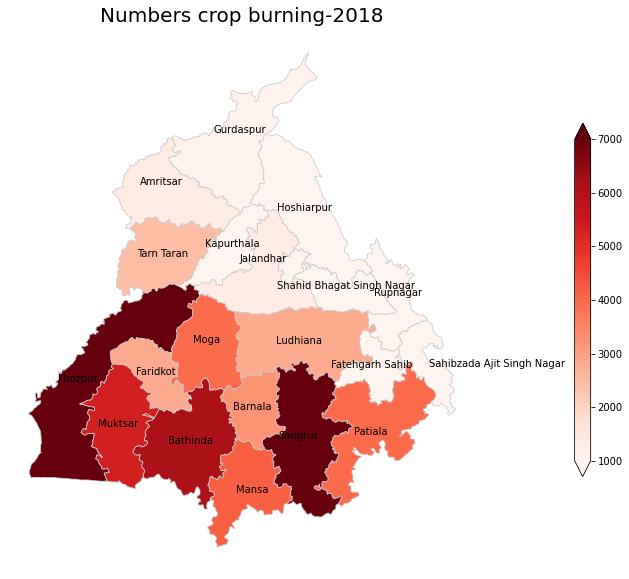

In [36]:
data=t18

merged=map_df.merge(data,left_on='DISTRICT',right_on='district')
merged=merged[['district','geometry','num_crop_burning','percentage_crop_burning']]

variable='num_crop_burning'

vmin,vmax=1000,7000

fig, ax = plt.subplots(1, figsize=(35, 10))
# remove the axis
ax.axis('off')

ax.set_title('Numbers crop burning-2018', fontdict={'fontsize': '20', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm,extend='both',shrink=0.65)

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))


merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    if row['district']=='Sahibzada Ajit Singh Nagar':
        plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='left')
        continue
    plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='center')

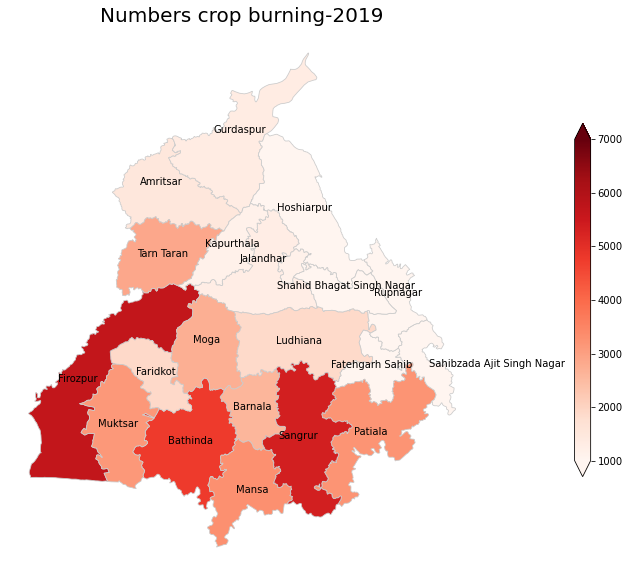

In [37]:
data=t19

merged=map_df.merge(data,left_on='DISTRICT',right_on='district')
merged=merged[['district','geometry','num_crop_burning','percentage_crop_burning']]

variable='num_crop_burning'

vmin,vmax=1000,7000

fig, ax = plt.subplots(1, figsize=(35, 10))
# remove the axis
ax.axis('off')

ax.set_title('Numbers crop burning-2019', fontdict={'fontsize': '20', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm,extend='both',shrink=0.65)

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))


merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    if row['district']=='Sahibzada Ajit Singh Nagar':
        plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='left')
        continue
    plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='center')

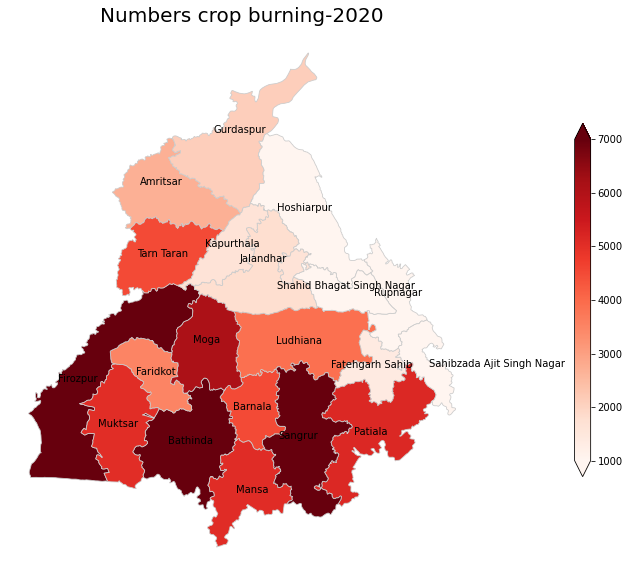

In [38]:
data=t20

merged=map_df.merge(data,left_on='DISTRICT',right_on='district')
merged=merged[['district','geometry','num_crop_burning','percentage_crop_burning']]

variable='num_crop_burning'

vmin,vmax=1000,7000

fig, ax = plt.subplots(1, figsize=(35, 10))
# remove the axis
ax.axis('off')

ax.set_title('Numbers crop burning-2020', fontdict={'fontsize': '20', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm,extend='both',shrink=0.65)

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))


merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    if row['district']=='Sahibzada Ajit Singh Nagar':
        plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='left')
        continue
    plt.annotate(text=row['district'], xy=row['coords'],horizontalalignment='center')